# * Descriptors Filter
### 1) nan값 제거
### 2) 상관계수 r

# * i-qsar
### 1) r^2
### 2) kurtosis
### 3) Shannon entropy

![fil](https://github.com/Siny-K/image/blob/master/fil.PNG?raw=true)

![corr](https://github.com/Siny-K/image/blob/master/corr.PNG?raw=true)

## Dragon 결과파일 
### 1st.txt의 Descriptors 갯수 : 분자 100개 29개의 그룹모두 1906개의 디스크립터 (근데 왜 4885개 안 나오는건지?)


### (Scriptor file for running Dragon : d_scriptor.drs)
![opthon](https://github.com/Siny-K/image/blob/master/list.PNG?raw=true)

[디스크립터 그룹](http://www.talete.mi.it/products/dragon_molecular_descriptors.htm)

[디스크립터 목록] (http://www.talete.mi.it/products/dragon_molecular_descriptor_list.pdf)



In [147]:
f = open('1st.txt')
item = f.readline()
item = item.split()
print len(item)

    

1906


### NAN값 제거 필터
### input : 1st.txt
### output : 2nd.csv

In [2]:
import pandas as pd
import numpy as np
csv_file =  pd.read_csv('1st.txt',sep='\t')

# how to use head fuction
# print csv_file.head(n=2) 

# Get header if CSV
csv_headr = list(csv_file.columns.values)

A = csv_file.isnull().any()

for fact in enumerate(A) :
    if fact[1] == True :
        col_Nan = csv_headr[fact[0]]
        del csv_file[col_Nan]
        
#print csv_file

csv_file.to_csv("2nd.csv", sep=",")



###  nan제거 후 2nd.csv 파일의 Descriptors 갯수
### 1906 -> (+1첫번째 칼럼) 1900  
### Descriptors 7개 감소 

In [1]:
f = open('2nd.csv')
item = f.readline()
item = item.split(',')
print len(item)


1900


## 상관계수 구하기 -Table

In [2]:
import pandas as pd
import numpy as np
from pandas import DataFrame, Series
data=pd.read_csv('2nd.csv')

data2=data.ix[:,3:]   #id와 분자 이름 날리기
a = data2.corr()
data2.corr()


,MW,AMW,Sv,Se,Mv,Me,Mp,Mi,nSK,nBM,...,DLS_07,DLS_cons,LLS_01,LLS_02,CMC-80,Inflammat-80,Hypertens-80,Hypnotic-80,Neoplastic-80,Infective-80
MW,1.000000,0.159407,0.938927,0.911639,0.114390,0.178097,0.096151,0.068075,0.974938,0.479994,...,-0.751670,-0.491965,-0.667308,-0.777160,0.181993,0.313270,0.285474,0.015454,2.707966e-01,0.192450
AMW,0.159407,1.000000,-0.120777,-0.221014,0.844661,0.712636,0.744556,-0.346867,0.003957,0.142620,...,-0.102159,-0.502655,-0.065233,-0.184289,-0.252193,-0.176915,-0.229335,-0.186651,-2.025183e-01,-0.052178
Sv,0.938927,-0.120777,1.000000,0.986406,-0.054479,-0.093360,-0.031352,0.041504,0.978959,0.517037,...,-0.670371,-0.345346,-0.602847,-0.676561,0.347418,0.475791,0.457681,0.109430,4.081035e-01,0.305860
Se,0.911639,-0.221014,0.986406,1.000000,-0.201418,-0.118956,-0.169106,0.164447,0.953460,0.399631,...,-0.675726,-0.248973,-0.629196,-0.661062,0.335895,0.472841,0.462486,0.106054,4.060367e-01,0.275861
Mv,0.114390,0.844661,-0.054479,-0.201418,1.000000,0.456550,0.869182,-0.697838,0.047527,0.484174,...,0.021306,-0.580837,0.076076,-0.069518,-0.082503,-0.089263,-0.128431,-0.067299,-9.080094e-02,0.081965
Me,0.178097,0.712636,-0.093360,-0.118956,0.456550,1.000000,0.095722,0.132814,0.075262,-0.073653,...,-0.166835,-0.285859,-0.433025,-0.139199,-0.363956,-0.253334,-0.311814,-0.261647,-2.602508e-01,-0.257584
Mp,0.096151,0.744556,-0.031352,-0.169106,0.869182,0.095722,1.000000,-0.751905,0.000158,0.423751,...,0.016590,-0.505040,0.284314,-0.105709,0.024417,0.004795,-0.018493,0.014717,-7.078624e-03,0.186020
Mi,0.068075,-0.346867,0.041504,0.164447,-0.697838,0.132814,-0.751905,1.000000,0.058539,-0.435449,...,-0.227604,0.219000,-0.382781,-0.170873,-0.152492,-0.114453,-0.077396,-0.146973,-1.415362e-01,-0.166851
nSK,0.974938,0.003957,0.978959,0.953460,0.047527,0.075262,0.000158,0.058539,1.000000,0.553147,...,-0.710162,-0.449205,-0.670514,-0.726679,0.256997,0.370974,0.348954,0.057153,3.266558e-01,0.227925
nBM,0.479994,0.142620,0.517037,0.399631,0.484174,-0.073653,0.423751,-0.435449,0.553147,1.000000,...,-0.197703,-0.575496,-0.188837,-0.280739,0.341451,0.232117,0.217298,0.160114,2.054371e-01,0.341451


## Heat Map 

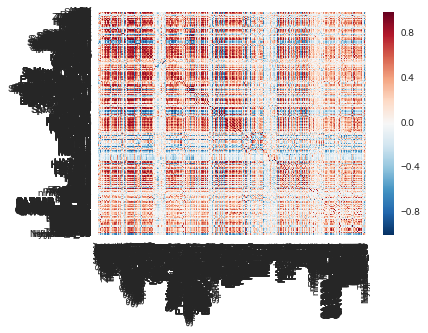

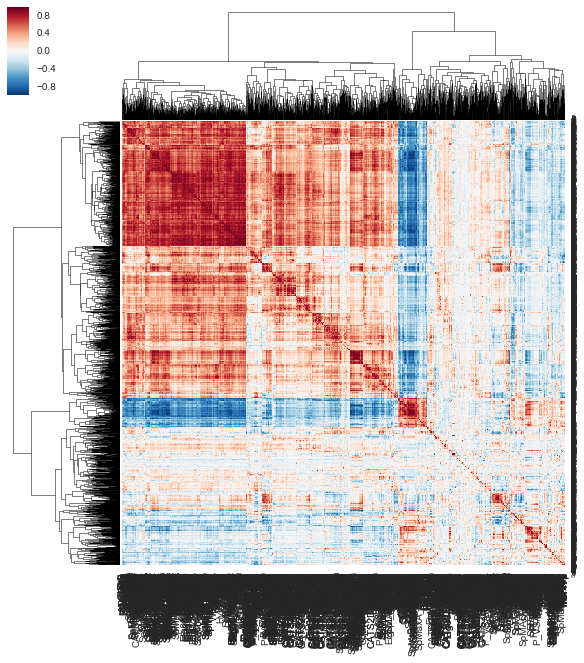

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from IPython.display import display, HTML
sns.heatmap(a)

#클러스터링
cm = sns.clustermap(a)
hm = cm.ax_heatmap.get_position()
plt.setp(cm.ax_heatmap.yaxis.get_majorticklabels(), fontsize=5)
cm.ax_heatmap.set_position([hm.x0, hm.y0, hm.width*1, hm.height])
col = cm.ax_col_dendrogram.get_position()
cm.ax_col_dendrogram.set_position([col.x0, col.y0, col.width*1, col.height*1])